In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import KFold, cross_val_score, GroupKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from tqdm import tqdm
import math
import gc
import warnings
warnings.filterwarnings('ignore')
from typing import List

In [2]:
test =pd.read_csv('Test.csv') 
train =pd.read_csv('Train.csv');train.head(2)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652


In [3]:
train.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [ ]:
['precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude',  'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_cloud_fraction',  'L3_HCHO_solar_azimuth_angle',
       'L3_HCHO_solar_zenith_angle',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_solar_zenith_angle',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_AER_AI_sensor_altitude', 
       'L3_AER_AI_solar_azimuth_angle',
       'L3_AER_AI_solar_zenith_angle', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_SO2_slant_column_number_density',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction',
       'L3_SO2_solar_azimuth_angle', 'L3_SO2_solar_zenith_angle',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle']

In [5]:
train['precipitable_water_entire_atmosphere'].max()
#CH4 , CH4 FORMS DROP TROSPHERIC -AGGERATE CH4
#CO

72.5999984741211

In [20]:
train['L3_CH4_solar_azimuth_angle'].value_counts()

 0.0      2915
-167.0     112
-170.0     102
-168.0      99
-162.0      99
          ... 
-7.0         1
 111.0       1
 161.0       1
 171.0       1
-116.0       1
Name: L3_CH4_solar_azimuth_angle, Length: 165, dtype: int64

In [ ]:
def azimuth(x):
    if x == 0 and x <= 9:
        return 0
    elif x > 9 and x <= 25:
        return 20
    elif x > 25 and x <= 50:
        return 45
    elif x > 50 and x <= 74:
        return 60
    elif x > 74 and x <= 120:
        return 90
    else:
        return 180
train['L3_CH4_solar_azimuth_angle'] =train['L3_CH4_solar_azimuth_angle'].apply(azimuth)

In [ ]:
#add temperature with solar
#add morning

In [14]:
train['L3_CH4_solar_azimuth_angle']=train['L3_CH4_solar_azimuth_angle'].round(0)

In [21]:
train[train['L3_CH4_solar_azimuth_angle']== 60]

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
13531,E3VXRRJ X 2020-02-08,2020-02-08,E3VXRRJ,94.0,47.0,174.0,14632.9,120,8.2,48.799999,...,49.55398,5.249568,68.320796,1816.750514,4212.878446,0.0188,5.278249,51.293051,60.0,67.943872


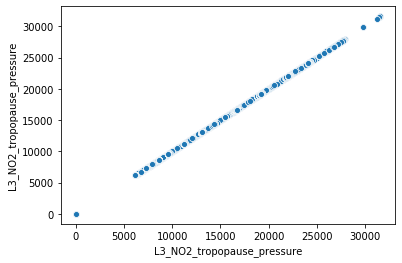

In [9]:
sns.scatterplot(x='L3_NO2_tropopause_pressure', y='L3_NO2_tropopause_pressure', data =train)

In [3]:
train.drop(['Place_ID X Date','target_min', 'target_max', 'target_variance','target_count'], axis=1, inplace =True)
test.drop(['Place_ID X Date'], axis=1, inplace =True)

In [4]:
df = pd.concat([train, test]).reset_index(drop=True)

In [5]:
df = pd.concat([train, test]).reset_index(drop=True)#SOLAR-CH4SO2
df['solar_zenith_CH4SO2']=df['L3_CH4_solar_zenith_angle'] + df['L3_SO2_solar_zenith_angle']
df['solar_azimuth_CH4S02']= df['L3_CH4_solar_azimuth_angle'] + df['L3_SO2_solar_azimuth_angle']
#SENSOR-CH4SO2
df['sensor_zenith_CH4S02']= df['L3_CH4_sensor_zenith_angle'] + df['L3_SO2_sensor_zenith_angle']
df['sensor_azimuth_CH4S02']= df['L3_CH4_sensor_azimuth_angle'] + df['L3_SO2_sensor_azimuth_angle']

#SOLAR-NOSO2
df['solar_zenith_SO2NO2']=df['L3_SO2_solar_zenith_angle'] + df['L3_NO2_solar_zenith_angle']
df['solar_azimuth_S02NO2']= df['L3_SO2_solar_azimuth_angle'] +df['L3_NO2_solar_azimuth_angle']
#SENSOR-NOSO2
df['sensor_zenith_SO2NO2']=df['L3_SO2_sensor_zenith_angle'] + df['L3_NO2_sensor_zenith_angle']
df['sensor_azimuth_S02NO2']= df['L3_SO2_sensor_azimuth_angle'] +df['L3_NO2_sensor_azimuth_angle']

#SOLAR-C2H3NO5
df['solar_zenith_C2H3NO5']=df['L3_CO_solar_zenith_angle'] + df['L3_HCHO_solar_zenith_angle'] +df['L3_O3_solar_zenith_angle']
df['solar_azimuth_C2H3NO5']=df['L3_CO_solar_azimuth_angle'] + df['L3_HCHO_solar_azimuth_angle'] +df['L3_O3_solar_azimuth_angle']
#SENSOR-C2H3NO5
df['sensor_zenith_C2H3NO5']=df['L3_CO_solar_zenith_angle'] + df['L3_HCHO_solar_zenith_angle'] +df['L3_O3_solar_zenith_angle']
df['sensor_azimuth_C2H3NO5']=df['L3_CO_sensor_azimuth_angle'] + df['L3_HCHO_sensor_azimuth_angle'] +df['L3_O3_sensor_azimuth_angle']
#GAS LAW
df['p/a'] =df['L3_NO2_tropopause_pressure'] / df['precipitable_water_entire_atmosphere']
df['pressure_altitude']=(df['L3_CLOUD_cloud_base_pressure'] - df['L3_CLOUD_cloud_optical_depth']) *304.8
df['pressure_altitude']=df['pressure_altitude']+df['L3_AER_AI_sensor_altitude'] +120 
df['pressure_altitude'] =(df['pressure_altitude'] * df['precipitable_water_entire_atmosphere']) -5
                                                          

In [6]:
test.shape

(16136, 76)

In [7]:
def get_date_features(df):
    df['Date'] = pd.to_datetime(df["Date"], format = "%Y-%m-%d", errors='coerce')
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['quarter'] = df['Date'].dt.quarter
get_date_features(df)

In [8]:
def get_season(df):
    if df['month'] >= 3 and df['month'] <= 5:
        return 'rainyseason'
    elif df['month'] >= 6 and df['month'] <= 8:
        return 'midseason'
    elif df['month'] >= 9 and df['month'] <= 11:
        return 'dryseason1'
    else:
        return 'dryseason2'

df['Season'] = df.apply(get_season, axis=1)

In [9]:
def daysmonth(df):
    if df['month']== 1:
        return 31
    elif df['month']== 2:
        return 29
    elif df['month'] == 3:
        return 31
    else:
        return 30

df['days_in_months'] = df.apply(daysmonth, axis=1)

In [10]:
#df = pd.get_dummies(df, columns =['Place_ID'] ,drop_first=True)
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'. 
df['Place_ID']= label_encoder1.fit_transform(df['Place_ID'])
#df['Season']= label_encoder2.fit_transform(df['Season'])

In [11]:
length = len(train)
train = df[:length]
test = df[length:]

In [12]:
train.shape

(30557, 97)

In [13]:
def encode_AG__2(group ,main_columns, aggregations, train_df=train, test_df=test, ext_src=None,
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
            for agg_type in aggregations:
                if ext_src is None: 
                    temp_df = pd.concat([train_df[group +[main_column]], test_df[group +[main_column]]])
                    new_col_name = group[0]+"_"+group[1]+"_"+main_column+'_'+agg_type
                                    
                else:
                    temp_df = ext_src.copy()
                    new_col_name = "ext_data"+ "_"+group[0]+"_"+group[1]+"_"+main_column+'_'+agg_type
                    
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby(group)[main_column].agg([agg_type]).reset_index(level=group).rename(
                                                        columns={agg_type: new_col_name})
                
                


                train_df[new_col_name] = pd.merge(train_df, temp_df, on=group, how='left')[new_col_name].astype('float32')
                test_df[new_col_name]  = pd.merge(test_df, temp_df, on=group, how='left')[new_col_name].astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
            
def encode_AG(uids ,main_columns, aggregations, train_df=train, test_df=test, ext_src=None,
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS
    for main_column in main_columns:  
        for col in uids:
            for agg_type in aggregations:
                if ext_src is None: 
                    temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                    new_col_name = main_column+'_'+col+'_'+agg_type
                                    
                else:
                    temp_df = ext_src.copy()
                    new_col_name = "ext_data"+ "_"+main_column+'_'+col+'_'+agg_type

                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')

# COMBINE FEATURES
def encode_CB(col1,col2,df1=train,df2=test):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str) 
#     encode_LE(nm,verbose=False)
    print(nm,', ',end='')
    
# GROUP AGGREGATION NUNIQUE
def encode_AG2( uids,main_columns, train_df=train, test_df=test):
    for main_column in main_columns:  
        for col in uids:
            comb = pd.concat([train_df[[col]+[main_column]],test_df[[col]+[main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

In [14]:
print(train.shape, test.shape)

(30557, 97) (16136, 97)


In [15]:
train.columns

Index(['Date', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_AER_AI_sensor_altitude', 'L3_AER_AI_sensor_azimuth_angle',
       'L3_AER_AI_sensor_zenith_angle', 'L3_AER_AI_solar_azimuth_angle',
       'L3_AER_AI_solar_zenith_angle',
       'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_sensor_azimuth_angle', 'L3_CLOUD_sensor_zenith_angle',
       'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_solar_zenith_angle',
       'L3_CLOUD_surface_albedo', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_

# UNIVARIATE ANALYSIS -Month

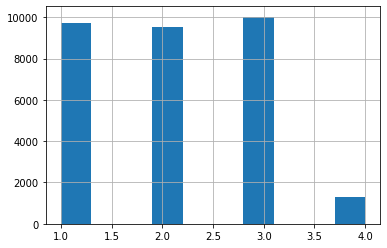

In [16]:
train['month'].hist()

# BIVARIATE ANALYSIS -Month

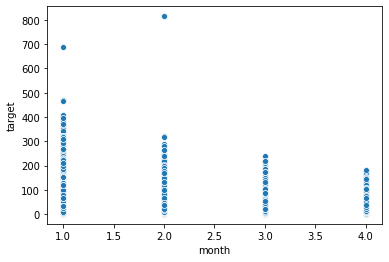

In [17]:
sns.scatterplot(x='month', y='target', data=train)

# UNIVARIATE ANALYSIS -precipitable_water_entire_atmosphere

In [18]:
train['precipitable_water_entire_atmosphere'].value_counts()

7.100000     109
10.400001    102
6.100000     101
7.000000     100
10.300000     99
            ... 
10.925000      1
17.842858      1
11.175000      1
17.471657      1
17.315077      1
Name: precipitable_water_entire_atmosphere, Length: 12638, dtype: int64

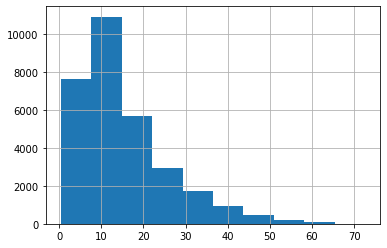

In [19]:
train['precipitable_water_entire_atmosphere'].hist()

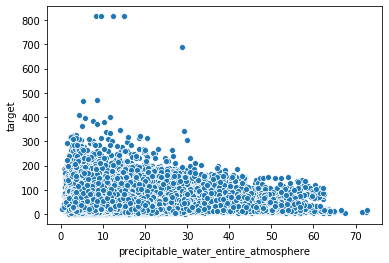

In [20]:
sns.scatterplot(x='precipitable_water_entire_atmosphere', y='target', data=train)

In [21]:
#precipitation per month
train['precipitation per month']= train['precipitable_water_entire_atmosphere']/train['days_in_months']
test['precipitation per month']= test['precipitable_water_entire_atmosphere']/test['days_in_months']

# UNIVARIATE ANALYSIS - PLACE-ID

In [22]:
train['Place_ID'].value_counts()

511    94
6      94
373    94
389    94
405    94
       ..
318    41
400    29
92     12
333     7
76      3
Name: Place_ID, Length: 340, dtype: int64

In [23]:
train['Freq_Place_ID']=train['Place_ID'].map(train['Place_ID'].value_counts())
test['Freq_Place_ID']=test['Place_ID'].map(test['Place_ID'].value_counts())

In [24]:
encode_AG(['Place_ID'] ,  ['precipitable_water_entire_atmosphere'], ['mean','min','max','std'], train_df=train,test_df=test,
              fillna=True, usena=False)

'precipitable_water_entire_atmosphere_Place_ID_mean' , 'precipitable_water_entire_atmosphere_Place_ID_min' , 'precipitable_water_entire_atmosphere_Place_ID_max' , 'precipitable_water_entire_atmosphere_Place_ID_std' , 

In [25]:
encode_AG__2(['Place_ID','precipitable_water_entire_atmosphere'] ,  ['month'], ['mean','min','max','std'], train_df=train,test_df=test,
              fillna=True, usena=False)

'Place_ID_precipitable_water_entire_atmosphere_month_mean' , 'Place_ID_precipitable_water_entire_atmosphere_month_min' , 'Place_ID_precipitable_water_entire_atmosphere_month_max' , 'Place_ID_precipitable_water_entire_atmosphere_month_std' , 

# UNIVARIATE ANALYSIS - L3_AER_AI_absorbing_aerosol_index

In [26]:
#A measure of the prevalence of aerosols in the atmosphere
#that index "detects the presence of uv-absorbing aerosols such as dust and smoke".
#+values of Aerosol Index generally represent absorbing aerosols (dust and smoke) while small or -values represent non-absorbing aerosols and clouds
#Observation and monitoring of the aerosol background in the troposphere is very important for atmospheric physics.
train['L3_AER_AI_absorbing_aerosol_index'].value_counts()

-1.516513    1
-1.530617    1
-1.761528    1
-0.435341    1
-1.640505    1
            ..
-0.255618    1
-0.976335    1
-1.311504    1
-0.773203    1
-0.985409    1
Name: L3_AER_AI_absorbing_aerosol_index, Length: 30360, dtype: int64

In [27]:
train['-L3_AER_AI_absorbing_aerosol_index'] = train.L3_AER_AI_absorbing_aerosol_index[train.L3_AER_AI_absorbing_aerosol_index < 0]
train['+L3_AER_AI_absorbing_aerosol_index'] = train.L3_AER_AI_absorbing_aerosol_index[train.L3_AER_AI_absorbing_aerosol_index >= 0]

In [28]:
test['-L3_AER_AI_absorbing_aerosol_index'] = test.L3_AER_AI_absorbing_aerosol_index[test.L3_AER_AI_absorbing_aerosol_index < 0]
test['+L3_AER_AI_absorbing_aerosol_index'] = test.L3_AER_AI_absorbing_aerosol_index[test.L3_AER_AI_absorbing_aerosol_index >= 0]

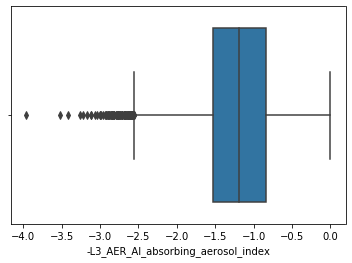

In [29]:
sns.boxplot(train['-L3_AER_AI_absorbing_aerosol_index'])

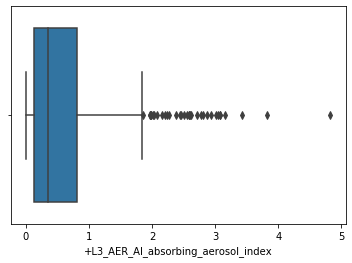

In [30]:
sns.boxplot(train['+L3_AER_AI_absorbing_aerosol_index'])

In [31]:
#Handle outliers

## BIVARIATE ANALYSIS

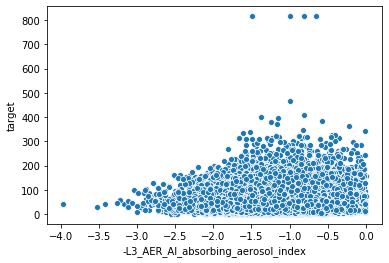

In [32]:
sns.scatterplot(x='-L3_AER_AI_absorbing_aerosol_index', y='target', data=train)

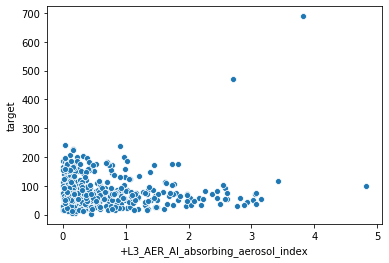

In [33]:
sns.scatterplot(x='+L3_AER_AI_absorbing_aerosol_index', y='target', data=train)

In [34]:
train['L3_SO2_SO2_column_number_density_amf'].unique()

array([0.31252085, 0.43395721, 0.35692461, ..., 0.23461286, 0.26371515,
       0.54644714])

In [35]:
train=train.round(2)
test=test.round(2)

In [36]:
#length = len(train)
#train = df[:length]
#test = df[length:]

In [37]:
#test.drop('target', axis=1, inplace =True)

In [38]:
train["Place_ID_precipitable_water_entire_atmosphere_month_mean"] = train["Place_ID_precipitable_water_entire_atmosphere_month_mean"].astype(np.int)
train["Place_ID_precipitable_water_entire_atmosphere_month_min"] = train["Place_ID_precipitable_water_entire_atmosphere_month_min"].astype(np.int)
train["Place_ID_precipitable_water_entire_atmosphere_month_max"] = train["Place_ID_precipitable_water_entire_atmosphere_month_max"].astype(np.int)
train["Place_ID_precipitable_water_entire_atmosphere_month_std"] = train["Place_ID_precipitable_water_entire_atmosphere_month_std"].astype(np.int)

In [39]:
test["Place_ID_precipitable_water_entire_atmosphere_month_mean"] = test["Place_ID_precipitable_water_entire_atmosphere_month_mean"].astype(np.int)
test["Place_ID_precipitable_water_entire_atmosphere_month_min"] = test["Place_ID_precipitable_water_entire_atmosphere_month_min"].astype(np.int)
test["Place_ID_precipitable_water_entire_atmosphere_month_max"] = test["Place_ID_precipitable_water_entire_atmosphere_month_max"].astype(np.int)
test["Place_ID_precipitable_water_entire_atmosphere_month_std"] = test["Place_ID_precipitable_water_entire_atmosphere_month_std"].astype(np.int)

In [40]:
train["precipitable_water_entire_atmosphere_Place_ID_mean"] = train["precipitable_water_entire_atmosphere_Place_ID_mean"].astype(np.int)
train["precipitable_water_entire_atmosphere_Place_ID_min"] = train["precipitable_water_entire_atmosphere_Place_ID_min"].astype(np.int)
train["precipitable_water_entire_atmosphere_Place_ID_max"] = train["precipitable_water_entire_atmosphere_Place_ID_max"].astype(np.int)
train["precipitable_water_entire_atmosphere_Place_ID_std"] = train["precipitable_water_entire_atmosphere_Place_ID_std"].astype(np.int)

In [41]:
test["precipitable_water_entire_atmosphere_Place_ID_mean"] = test["precipitable_water_entire_atmosphere_Place_ID_mean"].astype(np.int)
test["precipitable_water_entire_atmosphere_Place_ID_min"] = test["precipitable_water_entire_atmosphere_Place_ID_min"].astype(np.int)
test["precipitable_water_entire_atmosphere_Place_ID_max"] = test["precipitable_water_entire_atmosphere_Place_ID_max"].astype(np.int)
test["precipitable_water_entire_atmosphere_Place_ID_std"] = test["precipitable_water_entire_atmosphere_Place_ID_std"].astype(np.int)

In [42]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

In [43]:
X = train.drop(['Date','target'], axis=1)
y = train['target']

In [44]:
test = test.drop(['target','Date'], axis=1)

In [45]:
test.shape

(16136, 107)

In [46]:
samp =pd.read_csv(r'C:\Users\DELL\Desktop\Hackhathons\Urban\SampleSubmission (1).csv')

# CAT BOOST

In [47]:
param = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse','sub_sample':0.9,
    'max_depth': -1,
    'learning_rate': 0.08,#
    'feature_fraction': 0.9,
    'num_threads' : 45,
    'num_leaves'  : 125, #255,
    'min_data_in_leaf' : 0,
    'min_sum_hessian_in_leaf' : 100,
    'verbose': 0}

In [ ]:
errcb=[]
y_pred_totcb=[]
fold=KFold(n_splits=4, random_state=273)
i=1

for train_index, test_index in fold.split(X,y):#X_trainx,y_trainx
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMRegressor(**param, random_state=188)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=50, early_stopping_rounds=100)
    preds=m.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(test)
    y_pred_totcb.append(p)

In [ ]:
pred =np.mean(y_pred_totcb,0)

In [ ]:
np.mean(errcb)

In [ ]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [ ]:
d = {"Place_ID X Date": samp['Place_ID X Date'], 'target':np.mean(y_pred_totcb,0)}
test_predictions_cat = pd.DataFrame(data=d)
test_predictions_cat = test_predictions_cat[["Place_ID X Date", 'target']]

In [ ]:
test_predictions_cat.head()

In [ ]:
test_predictions_cat.to_csv('cat3.csv', index=False)